In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data['MEDV'] = boston['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Split Data

In [11]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
# X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
X = data.drop(['MEDV'], axis=1)
Y = data['MEDV']

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X  = sc.fit_transform(X)

# Train / Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
XTrain, XTest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=10)

# Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dtr = DecisionTreeRegressor()
dtr.fit(XTrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [23]:
ypred = dtr.predict(XTest)
ypred

array([23.8, 24.1, 23.7, 25. , 21.9, 13.3, 44. , 18.7, 18.2, 44.8, 19.3,
       29.9, 29.6, 28.5, 31.2, 50. , 24.8, 17.6, 24.7, 18.3, 35.1, 15.4,
       21.4, 24.8, 34.7, 20.6, 16.5, 13.5, 44. , 17.2, 33. , 30.7, 22.5,
       25.2, 18.1, 24.5, 10.8, 34.7, 23.1, 22.9, 42.3, 29. ,  8.5, 29.8,
       19.4, 24.8, 21.5, 19.6, 50. , 14.5, 19.1, 17.1, 20.6, 50. , 26.5,
       30.7, 18.2, 21.7, 20. , 17.8, 20.1, 20.1, 50. , 50. , 28.4, 13.3,
       25. , 10.8, 29. , 21.9, 17.8, 23.3, 17.7, 27.9, 23.7, 12.7, 48.3,
       10.2, 18.5, 23.3, 21.7, 21.9, 20. , 24.8, 28.7, 28.7, 24.8, 32.2,
       28.7,  5. , 28.7, 16.2, 22.9, 24.8, 16.5, 16.5, 26.2, 21.7, 24.7,
       16.1, 22. , 23. , 20. , 21.9, 13.6, 21. , 18.9, 13.3, 31.2, 20.9,
        8.3, 18.4, 29. , 23.3, 24.7, 10.2, 22.5, 20.3, 13.1, 20.6, 25. ,
       35.4, 21.2, 15.6, 20.4, 22. , 13.4, 19.2, 24.4, 33.4, 26.5,  7.4,
       28.5, 28.5, 17.8, 25. , 22. , 34.6,  5.6,  5. , 26.2,  7.4, 17.8,
       21.9,  7.4, 17.3, 43.5, 21.9, 24.7, 20.9, 11

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred, ytest)

23.154013157894735

43  :  1.263823529411765


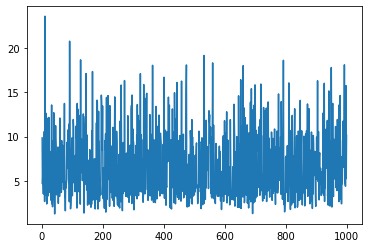

In [37]:
import matplotlib.pyplot as plt
error = []
irange = []

for i in range(1, 1000):
  XTrain, XTest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=i)
  dtr1 = DecisionTreeRegressor()
  dtr1.fit(XTrain, ytrain)
  ypred = dtr.predict(XTest)
  error.append(mean_squared_error(ypred, ytest))
  irange.append(i)

plt.plot(irange, error)
minimum = error.index(min(error))
print(irange[minimum+1], " : ", error[minimum])

In [33]:
XTrain, XTest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=33)
dtr1 = DecisionTreeRegressor()
dtr1.fit(XTrain, ytrain)
ypred = dtr.predict(XTest)
print("Error: ", mean_squared_error(ypred, ytest))

Error:  2.1512499999999997
